# Evaluation Wall of Dots


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import roundtrip_path_planner
import IPTestSuiteSS2023
fullBenchList = IPTestSuiteSS2023.benchList

In [2]:
Results = list()

## Basic PRM

In [ ]:
Environment_Test = fullBenchList[7]
StartList =[[4, 11]] 
GoalList = [[10, 10], [20,17], [1,1]]

# Eingabe
MultiQuery = False

Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"basePRM")

# Aufruf
if MultiQuery:
    Results.append(Planen.plan_MQ())
else:
    Results.append(Planen.plan())

## Lazy PRM

In [ ]:
Environment_Test = fullBenchList[7]
StartList =[[4, 11]] 
GoalList = [[10, 10], [20,17], [1,1]]

# Eingabe
MultiQuery = False

Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"lazyPRM")

# Aufruf
if MultiQuery:
    Results.append(Planen.plan_MQ())
else:
    Results.append(Planen.plan())

## Visibility PRM

In [ ]:
Environment_Test = fullBenchList[7]
StartList =[[4, 11]] 
GoalList = [[10, 10], [20,17], [1,1]]

# Eingabe
MultiQuery = False

Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"visibilityPRM")

# Aufruf
if MultiQuery:
    Results.append(Planen.plan_MQ())
else:
    Results.append(Planen.plan())

## Optimized Visibility PRM

visibilityPRM_custom [<class 'IPVisibilityPRM_Customized.VisPRM_Custom'>, {'ntry': 600}, <function visibilityPRM_custom_Visualize at 0x78429da27740>]
Planning: visibilityPRM_custom - Wall of Dots
ist in der methode
Graph und StatsHandler wurden zurückgesetzt
Start und Ziel überprüft: [[4, 11]], [[10, 10], [20, 17], [1, 1]]
Start- und Zielknoten zur StatsHandler hinzugefügt
Alle Knoten sind sichtbar: False
Startknoten zum Graph hinzugefügt
Zielknoten zum Graph hinzugefügt
Start und Ziel sind nicht sichtbar, Roadmap wird erstellt
Roadmap Lernschritt 0
Current node number: 4
New node number: 5
Knoten im Graphen:
['start', 'goal_1', 'goal_2', 'goal_3', 5, 6, 7, 11, 12, 15, 16, 18, 24, 26, 31, 32, 35, 37, 40, 45]

Kanten im Graphen:
[(5, 31), (5, 32), (5, 45), (7, 40), (12, 24), (15, 37), (16, 24), (16, 31), (18, 32), (18, 37), (26, 40), (35, 45)]
Liste der Knoten im Graph (NotRoadmap): ['start', 'goal_1', 'goal_2', 'goal_3']
PosList: {'start': [4, 11], 'goal_1': [10, 10], 'goal_2': [20, 17

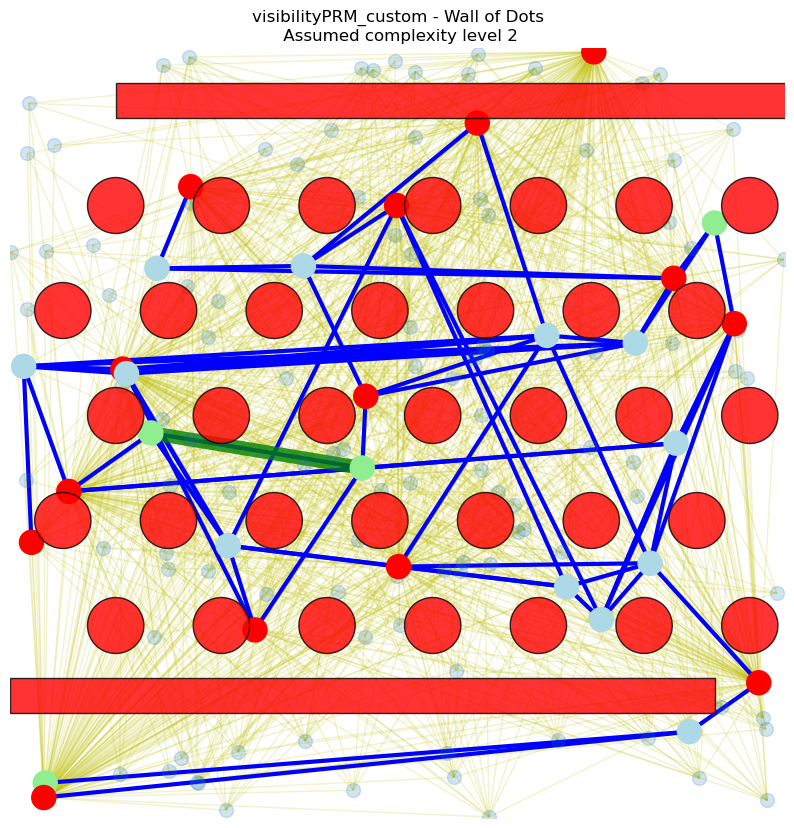

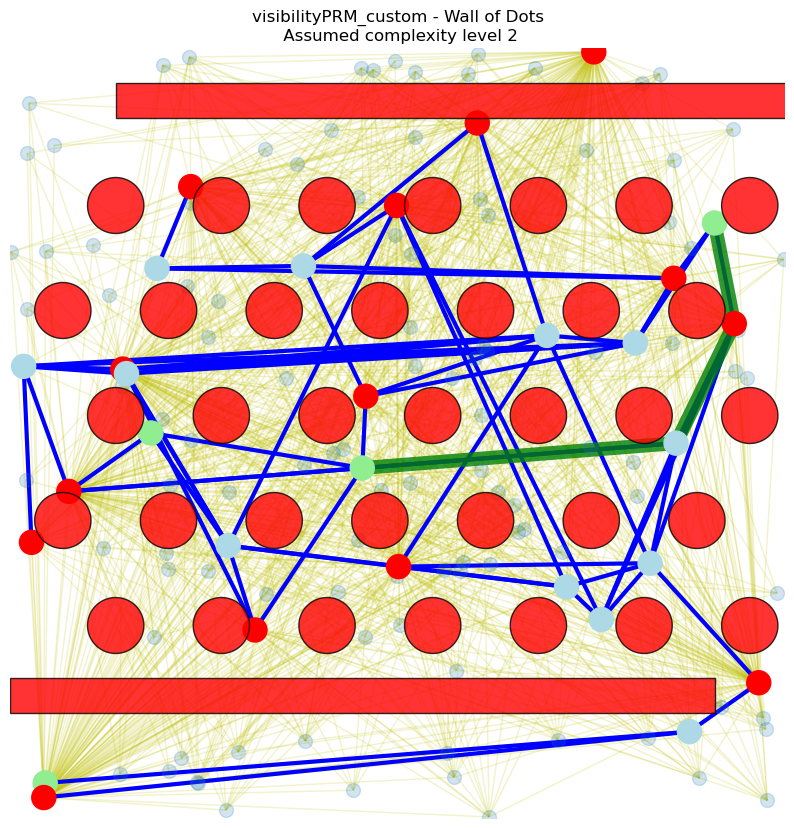

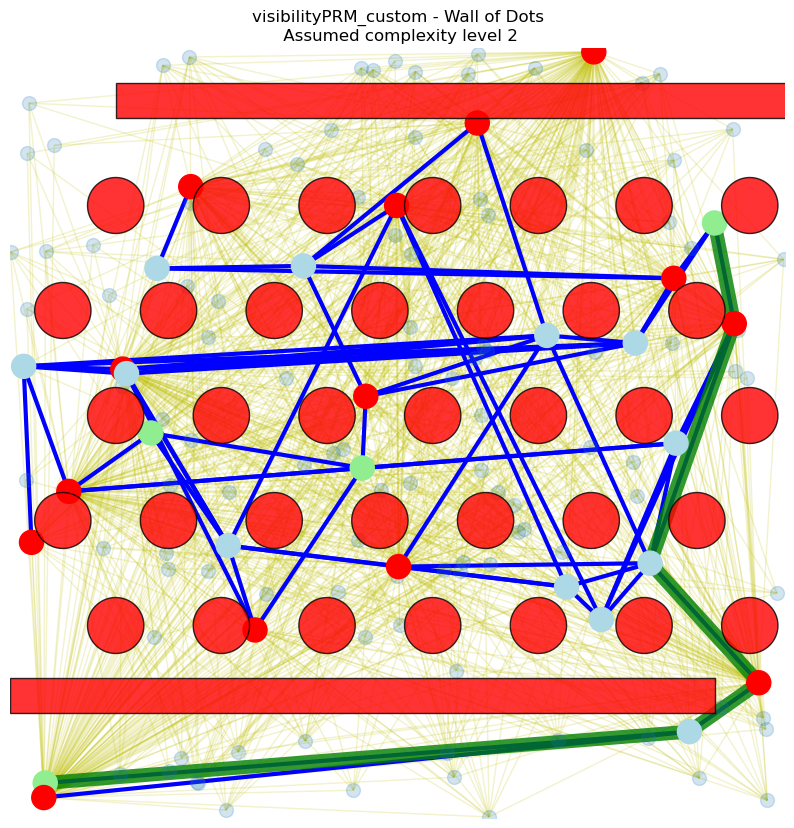

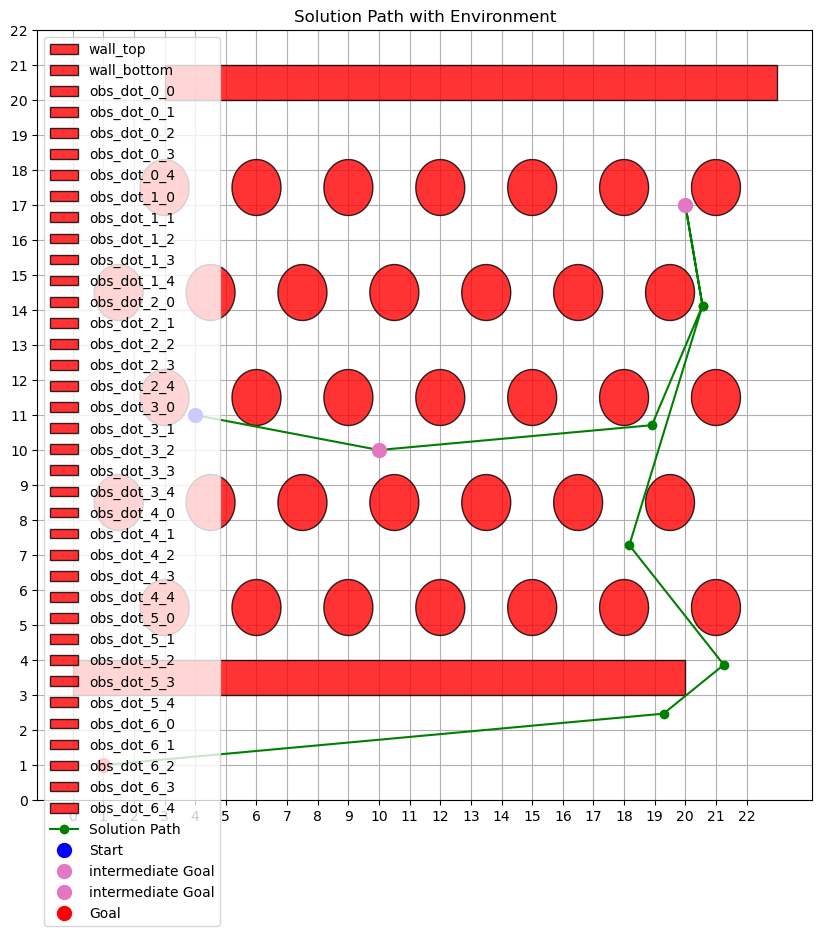

In [4]:
Environment_Test = fullBenchList[7]
StartList =[[4, 11]] 
GoalList = [[10, 10], [20,17], [1,1]]

# Eingabe
MultiQuery = True

Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,"visibilityPRM_custom")

# Aufruf
if MultiQuery:
    Results.append(Planen.plan_MQ())
else:
    Results.append(Planen.plan())

In [ ]:
print(Results[3][0].solution)

In [ ]:
variables = {}

for i in range(len(Results[0])):
    variable_name = f"Durchlauf_{i+1}"
    variables[variable_name] = []

for i in range(len(Results[0])):
    for algorithm in Results:
        variables[f"Durchlauf_{i+1}"].append(algorithm[i])

# Ergebnis ausgeben
for name, liste in variables.items():
    print(f"{name}: {liste}")
 


In [ ]:
for i in range(len(Results[0])):
    key = f"Durchlauf_{i+1}"
    if key in variables:
        # PerfMonitor aufrufen
        Durchlaufliste = variables[key]
        
    else:
        print(f"Key {key} does not exist in the dictionary.")

In [ ]:
for i in range(len(Results[0])):
    key = f"Durchlauf_{i+1}"
    if key in variables:
        # PerfMonitor aufrufen
        Durchlaufliste = variables[key]


        title = Results[0][0].benchmark.name
        pathLength = dict()
        planningTime = dict()
        roadmapSize  = dict()

        try:
            for result in Durchlaufliste:
                if result.benchmark.name == title:
                    #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                    pathLength[result.plannerFactoryName] = len(result.solution)
                    planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planPath"]
                    roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


            fig, ax = plt.subplots()

            width = 0.2

            ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
            ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
            ax.set_xticks(np.arange(len(pathLength.keys())) + width)
            ax.set_xticklabels(pathLength.keys())

            ax2 = ax.twinx()
            bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
            ax2.set_ylabel(title + " Planning time", color="y")

            # Add coloring and patterns on axis two
            hatches = ['x' if length==0 else '' for length in pathLength.values()]
            color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
            for i,thisbar in enumerate(bar.patches):
                thisbar.set_facecolor(color[i])
                thisbar.set_hatch(hatches[i])

            # Multiple axes 
            ax3 = ax.twinx()
            ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
            ax3.set_ylabel(title + " Roadmap size",  color="purple")
            ax3.spines['right'].set_position(('axes', 1.15))
            ax3.spines['right'].set_color("purple")
        except:
            pass


    else:
        print(f"Key {key} does not exist in the dictionary.")